### Levenberg–Marquardt (LM) Method

1. **Initialize**: Choose initial values $ x_0 \in \mathbb{R}^n $, $ \lambda_0 > 0 $, and tolerance $ \epsilon > 0 $.
2. **Set** $ k = 0 $.
3. **Repeat until convergence**:
   - Compute gradient $ g_k = \nabla f(x_k) $.
   - **Stopping criterion**: If $ \|g_k\| < \epsilon $, stop.
   - Solve for the next candidate point:
     $ \hat{x}_{k+1} = \arg \min_{x \in \mathbb{R}^n} \sum_{p=1}^{P} \left( f_p(x_k) + \nabla f_p(x_k)^T (x - x_k) \right)^2 + \lambda_k \|x - x_k\|^2 $.
   - **Update based on improvement**:
     - If $ f(\hat{x}_{k+1}) < f(x_k) $ (valid step):
       - Set $ x_{k+1} = \hat{x}_{k+1} $.
       - Update $ \lambda_{k+1} = 0.7 \lambda_k $.
     - Otherwise (null step):
       - Set $ x_{k+1} = x_k $.
       - Update $ \lambda_{k+1} = 2 \lambda_k $.
   - Increment $ k \leftarrow k + 1 $.
   
4. **End loop**.


## Fitting a piecewise-linear signal to measurements

Let $\mathcal{D} = \{(x_n, y_n) : 1 \leq n \leq N\}$ be noisy measurements of a signal, where $x_n \in \mathbb{R}$ represents a time instant and $y_n \in \mathbb{R}$ the corresponding measurement of the signal.

### Fitting a linear signal
If the signal is nearly linear (that is, it looks as a straight line when plotted), then fitting a linear model to it may be a good way to denoise the signal. To fit such a linear model, one would solve

$$
\min_{s, r} \sum_{n=1}^{N} (s x_n + r - y_n)^2,
$$

where the variables to optimize are the slope $s \in \mathbb{R}$ and the intercept at the origin $r \in \mathbb{R}$ of the linear model.

In terms of notation, it is advantageous to re-write this problem as

$$
\min_{s, r} \sum_{n=1}^{N} (\hat{y}(x_n) - y_n)^2,    \tag{10}
$$

where, for a generic $x$, we have

$$
\hat{y}(x) = sx + r,    \tag{11}
$$

being the output of the linear model at $x$. Note that the variables to optimize in problem (10) are still $s$ and $r$; they are simply not directly visible, being embedded within the notation $\hat{y}$.

### 2.1 Mixture of linear models

For simplicity, we assume from now on that we know the number of linear pieces in the underlying signal, which we denote by $K$. For example, for the signal in Figure 3, we have $K = 4$.

Even with the knowledge of $K$, fitting the linear segments is challenging because the switching points—where one segment ends and another begins—are not known and can be difficult to determine due to the noise in the measurements. If these switching points were provided, fitting the segments would just reduce to $K$ individual tasks of fitting a single line to disjoint intervals of the time axis.

To address all these issues, we pass from fitting a single linear model, as in (11), to fitting a mixture of linear models, as follows:

$$
\hat{y}(x) = \sum_{k=1}^{K} w_k(x) \hat{y}_k(x),    \tag{12}
$$


Here, 

$$
\hat{y}_k(x) = s_k x + r_k
$$

represents the output of the individual $k$th linear model at $x$, and

$$
w_k(x) = \frac{e^{u_k x + v_k}}{e^{u_1 x + v_1} + \cdots + e^{u_K x + v_K}},    \tag{13}
$$

represents the weight given to the $k$th linear model in forming the combined output $\hat{y}(x)$. Thus, each linear model $\hat{y}_k$ is parameterized by two variables, $s_k$ and $r_k$, and the set of weights $w_1, \dots, w_k$ are parameterized by $2K$ variables, $u_1$ to $u_K$ and $v_1$ to $v_K$.

### Weights
Note that the weights $w_1, \dots, w_K$ are positive and sum to one; hence, the output of the new model $\hat{y}$ is a convex mixture of the outputs of the basic linear models $\hat{y}_1, \dots, \hat{y}_K$.

More importantly, the weights are themselves a function of $x$. This is a key property. Indeed, if the weights were constant, then (12) would collapse to a single, global linear model of the form (11).

To understand the role played by the weights, consider an $x$ such that the quantity $u_k x + v_k$ is much larger than $u_l x + v_l$ for $l \neq k$. This implies that the single term $e^{u_k x + v_k}$ dominates the denominator in (13), leading to $w_k(x) \approx 1$ and $w_l(x) \approx 0$ for $l \neq k$. That is, $\hat{y}(x) \approx \hat{y}_k(x)$, which means that for that $x$, the linear model $\hat{y}_k$ is “switched on,” while the remaining models $\hat{y}_l$ are “switched off.” The variables $u_1, v_1, \dots, u_K, v_K$ that parameterize the weights $w_1, \dots, w_K$ thus serve to determine how the basic linear models $\hat{y}_1, \dots, \hat{y}_K$ are to be switched along the $x$ axis.

Let $\delta u$ and $\delta v$ be arbitrary real numbers. It is easy to check that, if each $u_k$ is replaced by $u_k + \delta u$ and $v_k$ by $v_k + \delta v$, the weight functions $w_1, \dots, w_K$ remain the same. To get rid of this redundancy in the parameterization of the weights, we consider from now on that $u_K = v_K = 0$. This reduces the parameters of the weights to the $2(K - 1)$ variables $u_1, v_1, \dots, u_{K-1}, v_{K-1}$.

### 2.2 Fitting the mixture to data

We thus arrive at the optimization problem

$$
\text{minimize}_{s_1, r_1, \dots, s_K, r_K \atop u_1, v_1, \dots, u_{K-1}, v_{K-1}} \sum_{n=1}^{N} \left( \hat{y}(x_n) - y_n \right)^2,    \tag{14}
$$


where $\hat{y}$ is given by (12).

### Task 10. [Numerical task] 

Solve the optimization problem (14) by coding yourself the Levenberg–Marquardt (LM) method described in the slides of the course. In particular, you need to find the gradient of the objective function analytically. For LM, start with $\lambda_0 = 1$ and stop the iterations when the norm of the gradient of $f$ falls below $\epsilon = 10^{-4}$ or a maximum of 5000 iterations is reached.

This task uses $K = 4$ and $N = 100$ and the measurements can be found in the file `lm_dataset_task.mat`, which contains the following column vectors:

- `x` of length $N$ with the measurements $\{x_n : 1 \leq n \leq N\}$;
- `y` of length $N$ with the measurements $\{y_n : 1 \leq n \leq N\}$;
- `u` of length $K-1$ that contains values of $\{u_k : 1 \leq k \leq K\}$;
- `v` of length $K-1$ that contains values of $\{v_k : 1 \leq k \leq K\}$;
- `s` of length $K$ that contains values of $\{s_k : 1 \leq k \leq K\}$;
- `r` of length $K$ that contains values of $\{r_k : 1 \leq k \leq K\}$.

Use the vectors `u`, `v`, `s`, and `r` above as the initialization of your LM iterates.

Once your LM algorithm has converged, report the values of the vectors `u`, `v`, `s`, and `r`, to which LM converged. Also, plot the obtained linear mixture (12) and the weights as a function of the time instants $x_n$ in the dataset. Finally, plot both the objective function of (14) and its gradient across the LM iterates. Comment on the results you observe.

An important numerical technique: Suppose you are given real numbers $\alpha_1, \dots, \alpha_K$ and you want to compute

$$
\frac{e^{\alpha_k}}{e^{\alpha_1} + \cdots + e^{\alpha_K}},
$$

for some $1 \leq k \leq K$. Such kind of computation appears, for example, in (13). If some $\alpha_i$ is large enough, the exponential of such $\alpha_i$ may overflow. A more robust technique is as follows: start by computing the maximum value of the $\alpha$'s, say, $\alpha = \max\{\alpha_1, \dots, \alpha_K\}$; then, compute

$$
\frac{e^{\alpha_k - \alpha}}{e^{\alpha_1 - \alpha} + \cdots + e^{\alpha_K - \alpha}}.
$$




In [8]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Load data from lm_dataset_task.mat
data = scipy.io.loadmat('data/lm_dataset_task.mat')

x = data['x'].flatten()  # Time instants (N,)
y = data['y'].flatten()  # Measurements (N,)
s = data['s'].flatten()  # Initial slopes (K,)
r = data['r'].flatten()  # Initial intercepts (K,)
u = data['u'].flatten()  # Initial u parameters (K-1,)
v = data['v'].flatten()  # Initial v parameters (K-1,)

# Constants
K = len(s)      # Number of linear models
N = len(x)      # Number of data points
print(f'K = {K}, N = {N}')

K = 4, N = 100


In [9]:
def compute_weights(x_n, u, v):
    # Append u_K = 0 and v_K = 0
    u_full = np.append(u, 0)
    v_full = np.append(v, 0)
    
    alpha = u_full * x_n + v_full
    max_alpha = np.max(alpha)
    exp_alpha = np.exp(alpha - max_alpha)
    sum_exp_alpha = np.sum(exp_alpha)
    w = exp_alpha / sum_exp_alpha
    return w

def compute_y_hat(x_n, s, r, u, v):
    y_hat = np.zeros_like(x_n)
    for i in range(N):
        w = compute_weights(x_n[i], u, v)
        y_k = s * x_n[i] + r
        y_hat[i] = np.dot(w, y_k)
    return y_hat

def compute_gradient(x, y, s, r, u, v):
    # Initialize gradient vector
    grad_s = np.zeros_like(s)
    grad_r = np.zeros_like(r)
    grad_u = np.zeros_like(u)
    grad_v = np.zeros_like(v)
    
    for i in range(N):
        x_n = x[i]
        y_n = y[i]
        # Compute weights and y_k
        w = compute_weights(x_n, u, v)
        y_k = s * x_n + r
        y_hat_n = np.dot(w, y_k)
        residual = y_hat_n - y_n
        
        # Partial derivatives w.r.t s_k and r_k
        for k in range(K):
            # w_k for current x_n
            w_k = w[k]
            # Derivative w.r.t s_k
            grad_s[k] += 2 * residual * w_k * x_n
            # Derivative w.r.t r_k
            grad_r[k] += 2 * residual * w_k
        
        # Partial derivatives w.r.t u_k and v_k (for k = 1 to K-1)
        for k in range(K - 1):
            # Compute partial derivatives of w_k
            u_full = np.append(u, 0)
            v_full = np.append(v, 0)
            alpha = u_full * x_n + v_full
            max_alpha = np.max(alpha)
            exp_alpha = np.exp(alpha - max_alpha)
            sum_exp_alpha = np.sum(exp_alpha)
            w_full = exp_alpha / sum_exp_alpha
            
            # Derivatives of w_k w.r.t u_k and v_k
            w_k = w_full[k]
            y_k = s[k] * x_n + r[k]
            # Compute sum over l
            sum_over_l = np.sum(w_full * y_k)
            d_wk_duk = w_k * (1 - w_k) * x_n
            d_wk_dvk = w_k * (1 - w_k)
            # Derivative of y_hat w.r.t u_k and v_k
            grad_u[k] += 2 * residual * (y_k - y_hat_n) * d_wk_duk
            grad_v[k] += 2 * residual * (y_k - y_hat_n) * d_wk_dvk
    # Combine gradients into a single vector
    grad = np.concatenate([grad_s, grad_r, grad_u, grad_v])
    return grad




In [10]:
# Initial parameter vector
theta = np.concatenate([s, r, u, v])

# LM parameters
lambda_k = 1.0
epsilon = 1e-4
max_iterations = 5000
k = 0

# To store history for plotting
objective_history = []
gradient_norm_history = []

# Start LM iterations
while k < max_iterations:
    # Compute current parameters
    s_k = theta[:K]
    r_k = theta[K:2*K]
    u_k = theta[2*K:2*K + (K - 1)]
    v_k = theta[2*K + (K - 1):]
    
    # Compute residuals and objective function
    y_hat = compute_y_hat(x, s_k, r_k, u_k, v_k)
    residuals = y_hat - y
    f_theta = np.sum(residuals**2)
    
    # Compute gradient
    grad = compute_gradient(x, y, s_k, r_k, u_k, v_k)
    gradient_norm = np.linalg.norm(grad)
    
    # Store for plotting
    objective_history.append(f_theta)
    gradient_norm_history.append(gradient_norm)
    
    # Check stopping criterion
    if gradient_norm < epsilon:
        print(f'Converged at iteration {k}')
        break
    
    # Compute Jacobian matrix J numerically
    # Since the Jacobian is large, we approximate it using finite differences
    # Alternatively, we can analytically compute it, but due to complexity, we proceed numerically here
    
    # Number of parameters
    num_params = len(theta)
    J = np.zeros((N, num_params))
    delta = 1e-8
    for j in range(num_params):
        theta_plus = theta.copy()
        theta_plus[j] += delta
        # Compute y_hat with perturbed parameter
        s_plus = theta_plus[:K]
        r_plus = theta_plus[K:2*K]
        u_plus = theta_plus[2*K:2*K + (K - 1)]
        v_plus = theta_plus[2*K + (K - 1):]
        y_hat_plus = compute_y_hat(x, s_plus, r_plus, u_plus, v_plus)
        residuals_plus = y_hat_plus - y
        # Compute numerical derivative
        J[:, j] = (residuals_plus - residuals) / delta
    
    # Compute Hessian approximation
    H = J.T @ J + lambda_k * np.eye(num_params)
    # Compute parameter update
    delta_theta = -np.linalg.solve(H, J.T @ residuals)
    
    # Compute candidate theta
    theta_new = theta + delta_theta
    # Compute new residuals and objective function
    s_new = theta_new[:K]
    r_new = theta_new[K:2*K]
    u_new = theta_new[2*K:2*K + (K - 1)]
    v_new = theta_new[2*K + (K - 1):]
    y_hat_new = compute_y_hat(x, s_new, r_new, u_new, v_new)
    residuals_new = y_hat_new - y
    f_theta_new = np.sum(residuals_new**2)
    
    # Update based on improvement
    if f_theta_new < f_theta:
        # Valid step
        theta = theta_new
        lambda_k *= 0.7
    else:
        # Null step
        lambda_k *= 2.0
    k += 1
else:
    print('Maximum iterations reached without convergence.')


/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_44069/205796576.py:62: RuntimeWarning: invalid value encountered in multiply
  H = J.T @ J + lambda_k * np.eye(num_params)


Maximum iterations reached without convergence.


In [11]:
# Extract final parameters
s_final = theta[:K]
r_final = theta[K:2*K]
u_final = theta[2*K:2*K + (K - 1)]
v_final = theta[2*K + (K - 1):]

print('Final parameter values after convergence:')
print('s (slopes):', s_final)
print('r (intercepts):', r_final)
print('u (weight parameters):', u_final)
print('v (weight parameters):', v_final)


Final parameter values after convergence:
s (slopes): [-1.20154645  3.26548679 -3.99969186 12.12571446]
r (intercepts): [-0.07694369 23.05884031 19.87664056 -2.65325396]
u (weight parameters): [-13.07707871 -94.10422654 136.95308458]
v (weight parameters): [  -2.34604219 -501.82301175 -288.25588574]


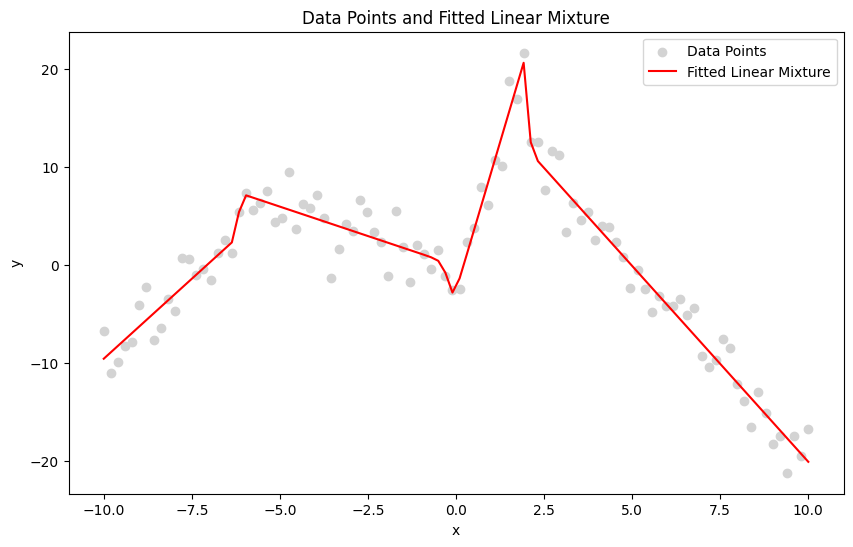

In [12]:
# Compute final y_hat
y_hat_final = compute_y_hat(x, s_final, r_final, u_final, v_final)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', color='lightgray')
plt.plot(x, y_hat_final, label='Fitted Linear Mixture', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Fitted Linear Mixture')
plt.legend()
plt.show()


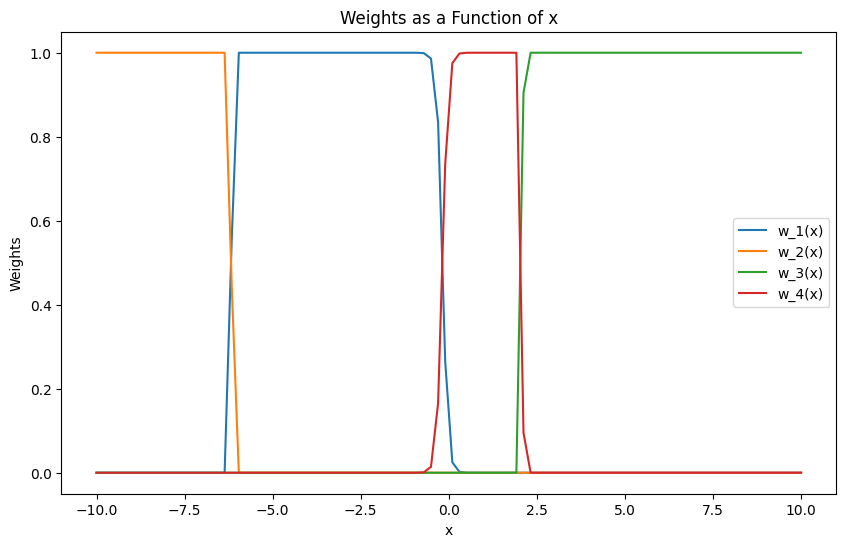

In [13]:
# Compute weights for each x_n
weights = np.zeros((N, K))
for i in range(N):
    weights[i, :] = compute_weights(x[i], u_final, v_final)

plt.figure(figsize=(10, 6))
for k in range(K):
    plt.plot(x, weights[:, k], label=f'w_{k+1}(x)')
plt.xlabel('x')
plt.ylabel('Weights')
plt.title('Weights as a Function of x')
plt.legend()
plt.show()


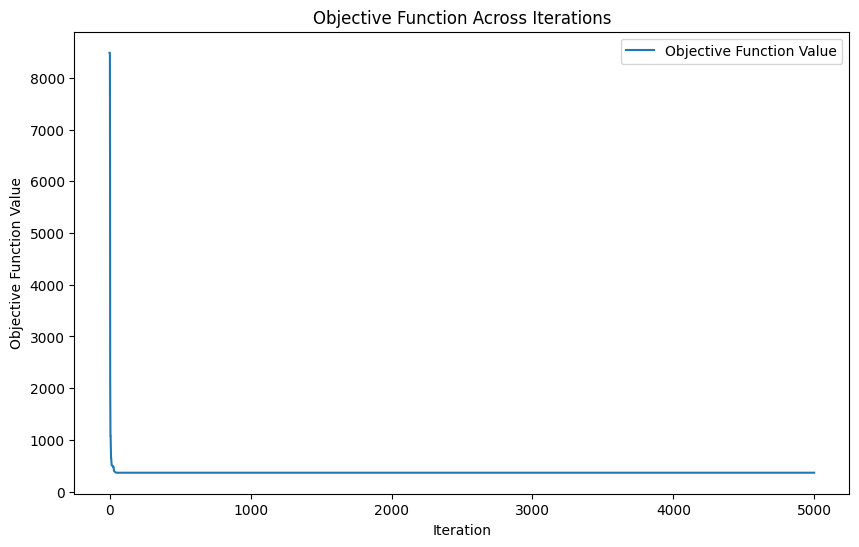

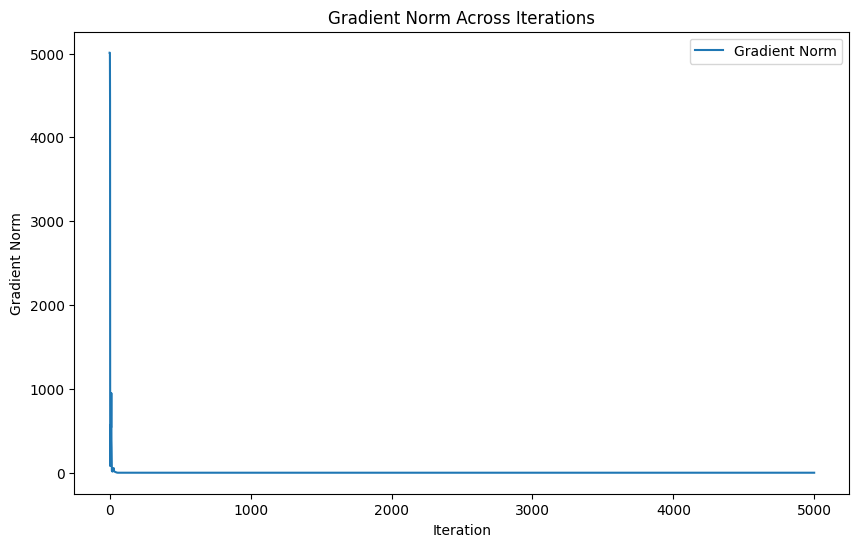

In [14]:
iterations = range(len(objective_history))

plt.figure(figsize=(10, 6))
plt.plot(iterations, objective_history, label='Objective Function Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Across Iterations')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(iterations, gradient_norm_history, label='Gradient Norm')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm Across Iterations')
plt.legend()
plt.show()
